# Εισαγωγή και επισκόπηση

Το παρόν dataset αφορά στην ταξινόμηση δύο πνευματικών καταστάσεων μέσω EEG (Ηλεκτροεγκεφαλικών) σημάτων : την κατάσταση Planning (κατά τη διάρκεια φαντασίας) και την κατάσταση Relax (χαλάρωσης). Αρχικά, εισάγουμε το dataset στο notebook μας και ξεκινάμε την μελέτη του. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline
import time
import warnings
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('../dataset/plrx.txt', delimiter = "\t", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.17936,-0.207000,-0.209710,-0.097260,-0.119210,-0.173220,-0.280760,0.223170,0.418660,-0.032886,0.003383,-0.334250,1.0,NaN
1,-0.14659,-0.164940,0.249870,-0.073985,0.494940,-0.156330,-0.288910,0.500800,-0.045553,0.050759,-0.017511,0.066959,1.0,NaN
2,-0.13131,0.518160,0.432810,0.397890,0.043127,0.563200,-0.013246,-0.062833,-0.883390,-0.040303,0.088057,0.631200,2.0,NaN
3,0.64940,0.418780,0.148350,0.333490,-0.219740,0.398910,0.590650,0.077100,-1.107200,-0.367230,0.364680,0.571720,1.0,NaN
4,-0.40628,0.115030,0.073336,0.070066,-0.030920,0.152050,-0.191420,-0.580430,-0.102250,0.153750,-0.126950,0.184570,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-0.55005,0.276290,-0.273240,0.113190,-0.776980,0.522660,-0.850620,0.440040,0.203910,-0.014462,0.002273,-0.100480,2.0,NaN
178,-0.78399,0.254600,-0.700990,-0.299170,-0.858330,0.210500,-0.530050,0.518550,-0.303190,0.020018,-0.020915,0.663940,1.0,NaN
179,0.29877,-0.179620,0.032859,-0.899010,0.540300,-0.361840,0.177900,0.713250,-0.098148,-0.411130,0.246830,-0.389160,2.0,NaN
180,-0.37812,-0.522870,0.215410,-0.243590,0.637840,-0.492210,-0.506930,-0.258110,-0.328990,-0.039117,0.007591,0.476030,1.0,NaN


Το dataset μας δεν έχει επικεφαλίδες.

In [3]:
df.shape
#τα δείγματα (instances) είναι οι γραμμές και τα χαρακτηριστικά (attributes) οι στήλες
#χρειάστηκε το header=None για να μην παίρνει ως επικεφαλίδα την πρώτη γραμμή

#λόγω space στο txt έχει μια έξτρα στήλη NaN που πρέπει να διορθωθεί.
#df.shape -> διαστάσεις dataframe

(182, 14)

In [4]:
print('Number of NaN values for each feature:\n', df.isnull().sum()) 

Number of NaN values for each feature:
 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13    182
dtype: int64


Παρατηρούμε πως στην τελευταία κολόνα λείπουν όλες οι τιμές, καθιστώντας την άχρηστη στην μελέτη του dataset, οπότε και την αφαιρούμε.

In [5]:
df.drop(13, axis=1, inplace=True)
#axis=1 όταν πρόκεται για κολόνα, inplace=True για να κάνει την αλλαγή και όχι μόνο να μας δείξει πως θα ήταν

df.shape

(182, 13)

Το παρόν dataset αποτελεί ένα binary dataset , καθώς οι κλάσεις μας αναπαραστώνται με τις τιμές 1 και 2. 

In [6]:
df[12].unique()

array([1., 2.])

In [7]:
df[12].value_counts()

1.0    130
2.0     52
Name: 12, dtype: int64

Με την παραπάνω εντολή μετράμε στην 13η κολόνα πόσες 1.0 τιμές υπάρχουν, άρα 130->1.0 και 52->2.0 συνεπώς, πρόκεται για μη ισορροπημένο dataset.

## Train - Test Split 

In [8]:
X = df.drop(12,axis=1)
y = df[12]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=7)
#το random_state αν ορίσουμε έναν int τότε βγάζει κάθε φορά το ίδιο αποτέλεσμα

In [9]:
y_train.value_counts(normalize=True)

1.0    0.708661
2.0    0.291339
Name: 12, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

1.0    0.727273
2.0    0.272727
Name: 12, dtype: float64

Παρακάτω βλέπουμε ότι δεν έχουμε διαφορετικούς τύπους στο dataset, μη κατηγορικά features, ενώ τα χαρακτηριστικά μας είναι όλα αριθμητικά και δεν συναντώνται διατεταγμένα χαρακτηριστικά. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       182 non-null    float64
 1   1       182 non-null    float64
 2   2       182 non-null    float64
 3   3       182 non-null    float64
 4   4       182 non-null    float64
 5   5       182 non-null    float64
 6   6       182 non-null    float64
 7   7       182 non-null    float64
 8   8       182 non-null    float64
 9   9       182 non-null    float64
 10  10      182 non-null    float64
 11  11      182 non-null    float64
 12  12      182 non-null    float64
dtypes: float64(13)
memory usage: 18.6 KB


## Μετρικές 

Οι μετρικές με τις οποίες θα γίνει η βελτιστοποίηση και η παρουσίαση των αποτελεσμάτων θα γίνει κάθε φορά ξεχωριστά για δύο μετρικές : την ορθότητα Accuracy και F-1 score.

# Ταξινόμηση 

### Για τον ταξινομητή Dummy

In [12]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [13]:
y_pred = dummy.predict(X_test)
print("Accuracy score of Dummy Classifier :",accuracy_score(y_test,y_pred))

Accuracy score of Dummy Classifier : 0.7272727272727273


In [14]:
print("F1 score of Dummy Classifier :",f1_score(y_test, y_pred, average='binary'))

F1 score of Dummy Classifier : 0.8421052631578948


### Για την μέθοδο Gaussian Naive Bayes (GNB)

In [15]:
NBModel=GaussianNB()
NBModel.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = NBModel.predict(X_test)
print("Accuracy score of GNB model :",accuracy_score(y_pred, y_test))

Accuracy score of GNB model : 0.5636363636363636


In [17]:
print("F1 score of GNB model :",f1_score(y_test, y_pred, average='binary'))

F1 score of GNB model : 0.7


### Για το KNN model

In [18]:
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred = neigh.predict(X_test)
print("Accuracy score of KNN Model :",accuracy_score(y_test, y_pred))

Accuracy score of KNN Model : 0.6545454545454545


In [20]:
print("F1 score of KNN Model :",f1_score(y_test, y_pred, average='binary'))

F1 score of KNN Model : 0.7912087912087913


### Για το LR

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
print("Accuracy score of LR Model :",accuracy_score(y_test, y_pred))

Accuracy score of LR Model : 0.7090909090909091


In [23]:
print("F1 score of LR Model :",f1_score(y_test, y_pred, average='binary'))

F1 score of LR Model : 0.8297872340425532


## Σχήμα διασταυρούμενης επικύρωσης

In [24]:
scores_dummy = cross_validate(dummy, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_dummy

{'fit_time': array([0.00125694, 0.00137711, 0.00053787, 0.00088573, 0.00093389,
        0.00077176, 0.00075006, 0.00074911, 0.00058699, 0.00080204]),
 'score_time': array([0.00289702, 0.00198293, 0.00214911, 0.00207424, 0.00242138,
        0.00196934, 0.00188184, 0.00182891, 0.00204182, 0.00277305]),
 'test_accuracy': array([0.69230769, 0.69230769, 0.69230769, 0.69230769, 0.69230769,
        0.69230769, 0.69230769, 0.75      , 0.75      , 0.75      ]),
 'test_f1': array([0.81818182, 0.81818182, 0.81818182, 0.81818182, 0.81818182,
        0.81818182, 0.81818182, 0.85714286, 0.85714286, 0.85714286])}

In [25]:
scores_nb = cross_validate(NBModel, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_nb

{'fit_time': array([0.00345278, 0.00176311, 0.00390697, 0.00227571, 0.00175691,
        0.00242996, 0.00166869, 0.00166607, 0.00166321, 0.00194097]),
 'score_time': array([0.00242305, 0.00267696, 0.0027442 , 0.00277019, 0.00261092,
        0.00238991, 0.00211406, 0.0021708 , 0.00305891, 0.00226593]),
 'test_accuracy': array([0.69230769, 0.76923077, 0.53846154, 0.69230769, 0.38461538,
        0.69230769, 0.61538462, 0.75      , 0.66666667, 0.58333333]),
 'test_f1': array([0.77777778, 0.84210526, 0.7       , 0.81818182, 0.55555556,
        0.8       , 0.76190476, 0.84210526, 0.77777778, 0.73684211])}

In [26]:
scores_neigh = cross_validate(neigh, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_neigh

{'fit_time': array([0.00596881, 0.00176311, 0.00269985, 0.00300217, 0.0015521 ,
        0.00157523, 0.00273108, 0.0016861 , 0.00156498, 0.0017221 ]),
 'score_time': array([0.00790501, 0.0059731 , 0.00482106, 0.00289893, 0.00286794,
        0.00351787, 0.00410533, 0.00285792, 0.00376821, 0.00282383]),
 'test_accuracy': array([0.61538462, 0.53846154, 0.53846154, 0.61538462, 0.53846154,
        0.61538462, 0.53846154, 0.58333333, 0.5       , 0.75      ]),
 'test_f1': array([0.76190476, 0.7       , 0.7       , 0.76190476, 0.66666667,
        0.73684211, 0.66666667, 0.73684211, 0.66666667, 0.85714286])}

In [27]:
scores_lr = cross_validate(lr, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_lr

{'fit_time': array([0.00858378, 0.00438881, 0.00543404, 0.00399423, 0.00446582,
        0.00444794, 0.00400877, 0.0040319 , 0.00420189, 0.00564814]),
 'score_time': array([0.00388312, 0.00334191, 0.00250506, 0.00326872, 0.00247717,
        0.00219226, 0.00315809, 0.00221205, 0.0022192 , 0.00218892]),
 'test_accuracy': array([0.69230769, 0.69230769, 0.61538462, 0.69230769, 0.69230769,
        0.69230769, 0.61538462, 0.75      , 0.75      , 0.75      ]),
 'test_f1': array([0.81818182, 0.81818182, 0.76190476, 0.81818182, 0.81818182,
        0.81818182, 0.76190476, 0.85714286, 0.85714286, 0.85714286])}

## Επίδοση out-of-the-box

#### Πίνακας markdown

||Accuracy|F1-Score|
|---|--|----|
|**dummy**|0.7272|0.8421|
|**GNB**|0.5636|0.7|
|**KNN**|0.6545|0.7912|
|**LR**|0.7090|0.8297|

#### Bar plot σύγκρισης

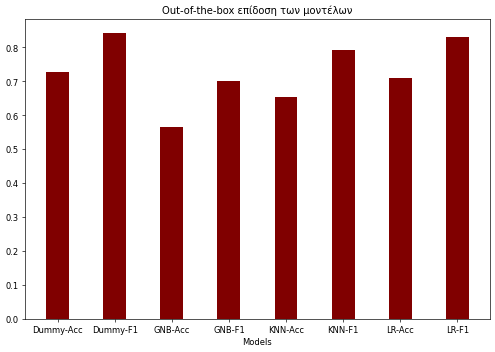

In [28]:
data = {'Dummy-Acc':0.7272, 'Dummy-F1':0.8421, 'GNB-Acc':0.5636, 'GNB-F1':0.7, 'KNN-Acc':0.6545, 'KNN-F1':0.7912, 'LR-Acc':0.7090,'LR-F1':0.8297}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize =(10,6.5),dpi=60)

plt.bar(courses,values,color='maroon', width=.4)
plt.xlabel("Models")
plt.title("Out-of-the-box επίδοση των μοντέλων")
plt.show()

Παρατηρούμε ότι στην out-of-the-box επίδοση των μοντέλων, ο dummy ταξινομητής παρουσιάζει τα καλύτερα scores τόσο σε ορθότητα όσο και F1-score. 

Όπως βλέπουμε η επίδοση των ταξινομητών GNB και KNN είναι μέτρια , κάτι που περιμέναμε χωρίς την κατάλληλη προεπεξεργασία και βελτίωση των υπερπαραμέτρων τους, ενώ ένας ακόμη λόγος για τις κακές αποδόσεις είναι το γεγονός ότι το dataset μας είναι μη ισορροπημένο. O LR ταξινομητής εμφανίζει τις καλύτερες επιδόσεις, γεγονός που θα εξετάσουμε παρακάτω αναλυτικόττερα, μετά από την προεπεξεργασία των δεδομένων και το tuning των υπερπαραμέτρων των ταξινομητών μας.

## Προεπεξεργασία δεδομένων 

Αρχικά θα εφαρμόσουμε την τεχνική της προεπεξεργασίας.  Το πρώτο βήμα είναι να εξασφαλίσουμε πως δεν απουσιάζουν δεδομένα, και πράγματι οπως έχουμε δει αυτό ήδη ισχύει (βλέπουμε πως δεν υπάρχουν NaN τιμές για καποιο από τα χαρακτηριστικά των δεδομένων μαςστο αντίστοιχο print).

Το επόμενο βήμα μας θα είναι η κανονικοποίηση των χαρακτηριστικων. Εδώ πρέπει να επιλέξουμε μεταξύ της μετατροπής σε standard score και της μετατροπής μεγίστου ελαχίστου. Θα χρησιμοποιησουμε μετατροπή σε standard score, καθώς γνωρίζουμε από την θεωρία ότι είναι καλύτερο για τους ταξινομητές.

In [29]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

Παρακάτω βλέπουμε πως οι τιμές κάθε κολόνας είναι στο εύρος -2.0 έως 1.0, ενώ με τον πίνακα των correlation των τιμών, παρατηρούμε πως ορισμένες κολόνες έχουν ισχυρή γραμμική συσχέτιση μεταξύ τους. 

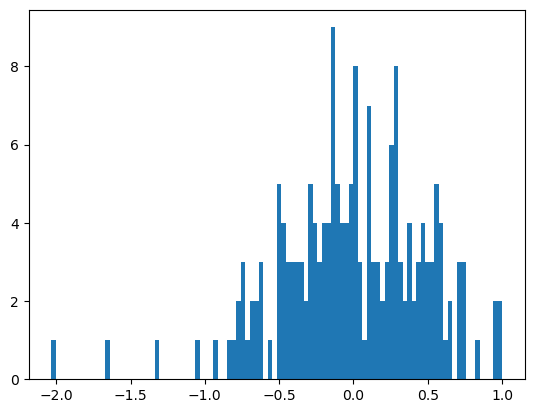

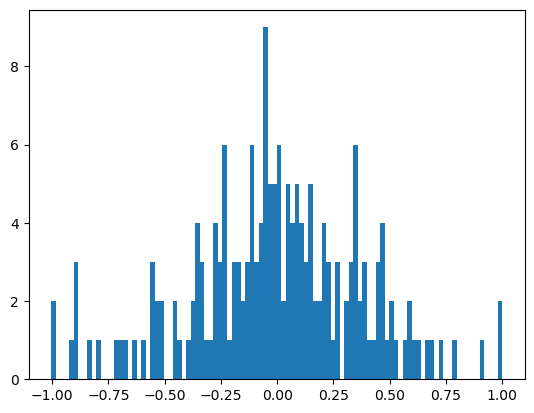

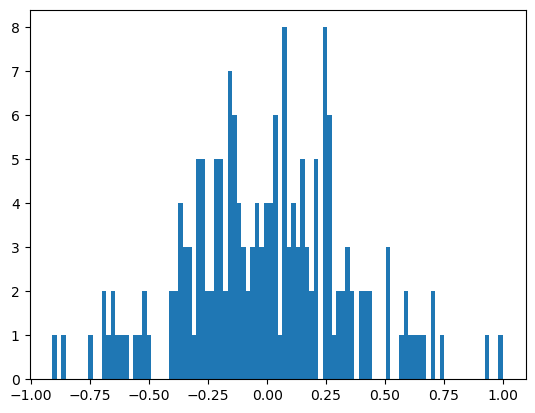

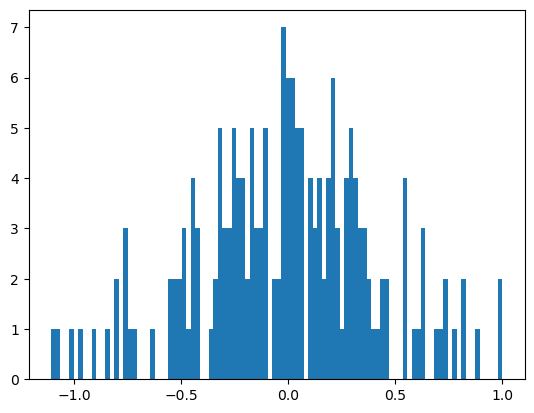

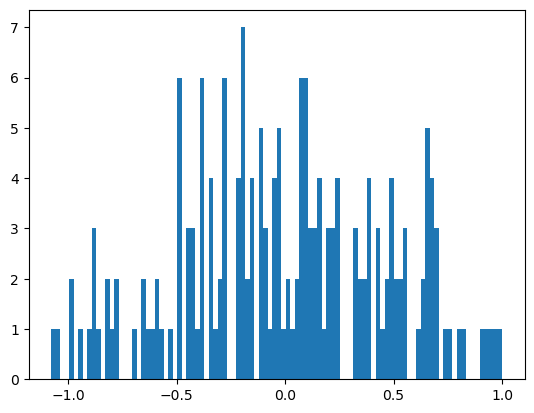

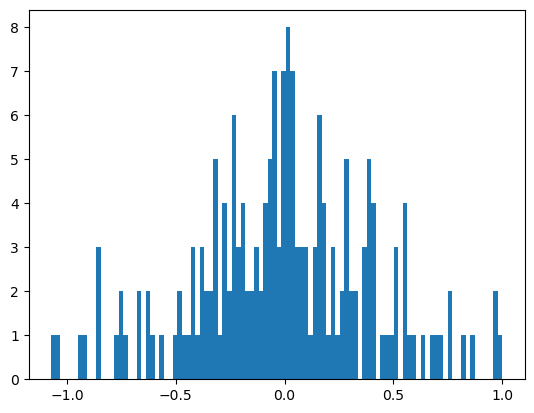

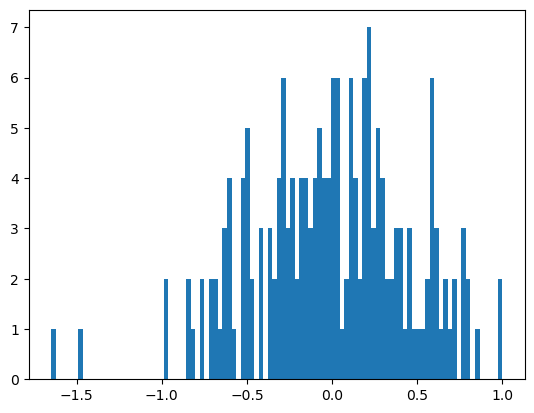

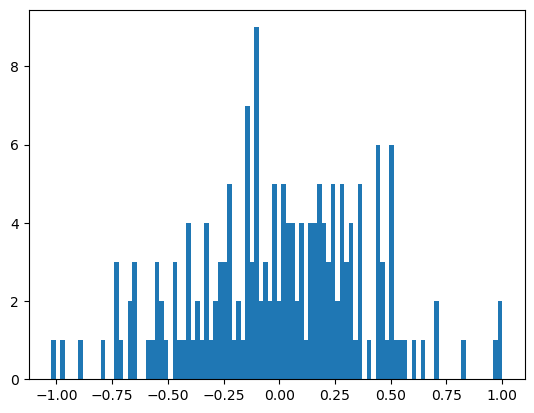

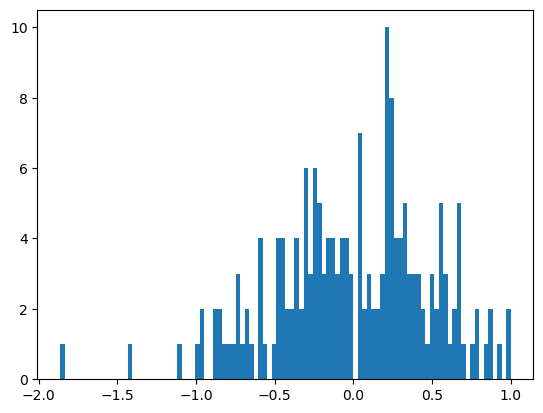

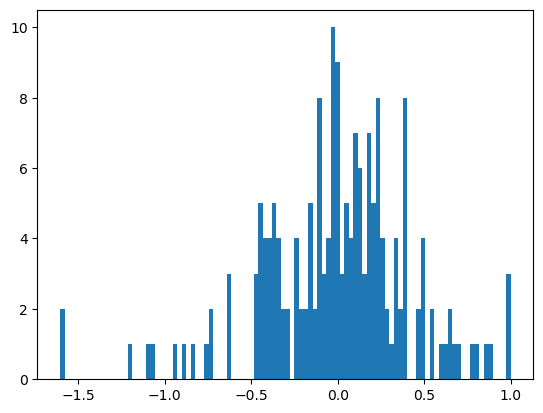

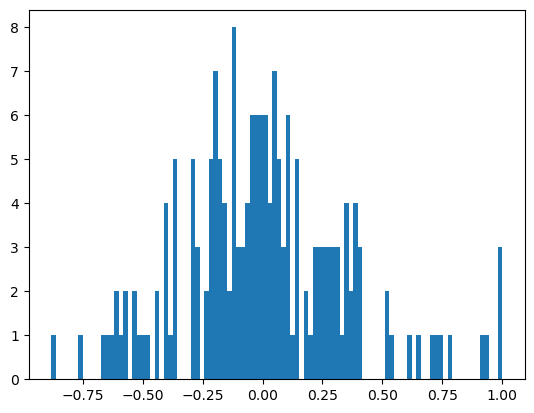

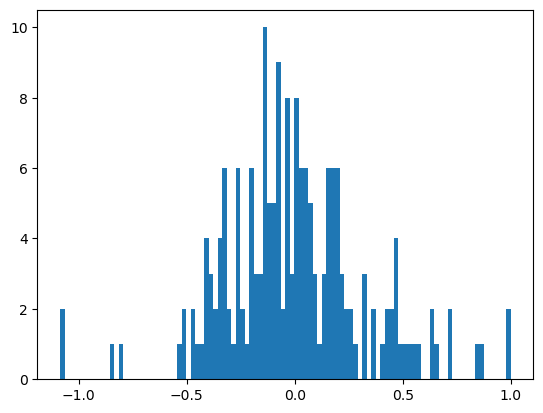

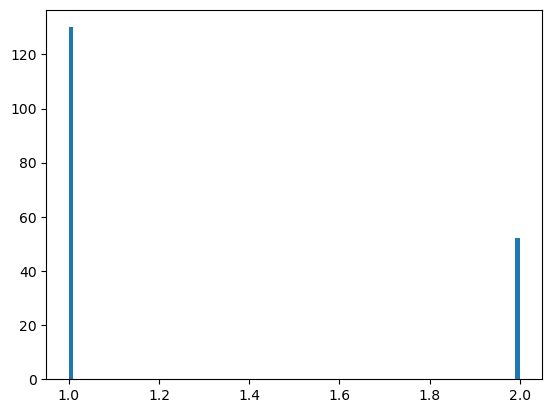

In [30]:
for col in df.columns:
    plt.hist(df[col], bins=100)
    plt.show()

### Features Correlations 

Από τον πίνακα των correlations των features του dataset μας, παρατηρούμε ευθύς αμέσως, ότι ορισμένες κολόνες έχουν πολύ ισχυρή συσχέτιση με κάποιες άλλες.

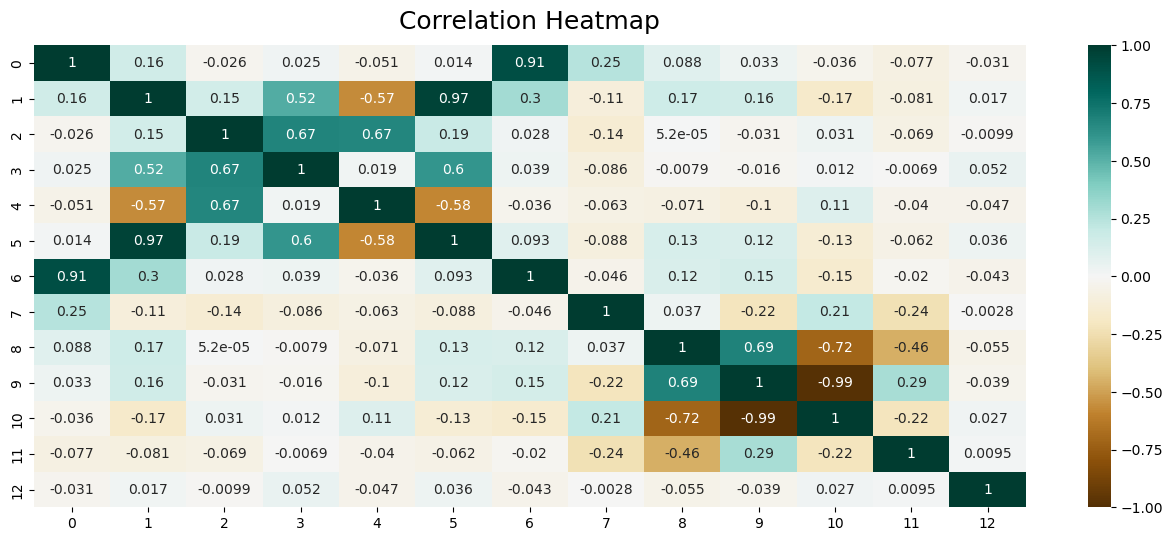

In [31]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Παρακάτω κάνουμε drop τις duplicated γραμμές που εντοπίσαμε στο dataset.

In [32]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

6


Το επόμενο βήμα μας θα είναι η κανονικοποίηση των χαρακτηριστικων. Εδώ πρέπει να επιλέξουμε μεταξύ της μετατροπής σε standard score και της μετατροπής μεγίστου ελαχίστου. Θα χρησιμοποιησουμε μετατροπή σε standard score, καθώς γνωρίζουμε από την θεωρία ότι είναι καλύτερο για τους ταξινομητές.

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Θα δοκιμάσουμε επίσης να μειώσουμε και άλλο την διαστατικότητα του dataset, αναλύοντάς το σε κύριες συνιστώσες.

In [34]:
selector = PCA(n_components=0.9)
X_train_scaled = selector.fit_transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

X_train_scaled.shape

(127, 5)

## Εύρεση βέλτιστων υπερπαραμέτρων 

### Ρύθμιση υπερπαραμέτρων στο KNN 

In [35]:
knn=KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = { 'n_neighbors' : list(range(1,40)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1',return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 234 candidates, totalling 2340 fits


In [36]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=19, weights='distance')

In [37]:
knn_tuned = grid_search.best_estimator_

y_pred = knn_tuned.predict(X_test_scaled)
print("Accuracy score of tuned KNN model :",accuracy_score(y_pred, y_test))

Accuracy score of tuned KNN model : 0.7454545454545455


In [38]:
print("F1 score of tuned KNN model :",f1_score(y_pred, y_test))

F1 score of tuned KNN model : 0.851063829787234


### Ρύθμιση υπερπαραμέτρων στο GNB 

In [39]:
NBModel=GaussianNB()
    
parameters = {
    'var_smoothing': [1e-1,1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
gnb = GridSearchCV(NBModel, parameters, cv=10)
gnb.fit(X_train_scaled, y_train)
gnb.best_estimator_

GaussianNB(var_smoothing=0.1)

In [40]:
gnb_tuned = gnb.best_estimator_

y_pred = gnb_tuned.predict(X_test_scaled)
print("Accuracy score of tuned GNB model :",accuracy_score(y_pred, y_test))

Accuracy score of tuned GNB model : 0.7272727272727273


In [41]:
print("F1 score of tuned GNB model :",f1_score(y_pred, y_test))

F1 score of tuned GNB model : 0.8421052631578948


### Linear Regression

Το Linear Regression μοντέλο δεν έχει ιδαίτερα critical υπερπαραμέτρους για να ρυθμίσουμε. Σε δοκιμές που πραγματοποιήσαμε αλλάζοντας τις τιμές σε υπερπαραμέτρους του μοντέλου (solver,penalty,C) δεν υπήρξε διαφορά στα επιθυμητά scores.

In [42]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test_scaled)
print("Accuracy score of LR Model after preprocessing :",accuracy_score(y_test, y_pred))

Accuracy score of LR Model after preprocessing : 0.7090909090909091


In [44]:
print("F1 score of LR Model after preprocessing :",f1_score(y_test, y_pred, average='binary'))

F1 score of LR Model after preprocessing : 0.8297872340425532


## Pipelining

### GNB Model

In [45]:
gnb_pipe = GaussianNB()
gnb_pipeline = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('clf', gnb_pipe)], memory = 'tmp')

start = time.time()
gnb_pipeline.fit(X_train_scaled, y_train)
end = time.time()

mlp_pipe_time = end - start

gnb_preds_pipe = gnb_pipeline.predict(X_test_scaled)
cr_mlp_pipe =classification_report(y_test, gnb_preds_pipe)
 
print('Scores per class 1.0 , 2.0   : \n', '\n', cr_mlp_pipe)
print('Confusion Matrix : \n', '\n',confusion_matrix(y_test, gnb_preds_pipe), '\n')
print('Fit time: ', mlp_pipe_time)
warnings.filterwarnings('ignore')

Scores per class 1.0 , 2.0   : 
 
               precision    recall  f1-score   support

         1.0       0.73      1.00      0.84        40
         2.0       0.00      0.00      0.00        15

    accuracy                           0.73        55
   macro avg       0.36      0.50      0.42        55
weighted avg       0.53      0.73      0.61        55

Confusion Matrix : 
 
 [[40  0]
 [15  0]] 

Fit time:  0.012896060943603516


/Users/thodorismexis/opt/anaconda3/envs/neural/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thodorismexis/opt/anaconda3/envs/neural/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thodorismexis/opt/anaconda3/envs/neural/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### KNN Model

In [46]:
knn_pipe = KNeighborsClassifier()
knn_pipeline = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('clf', knn_pipe)], memory = 'tmp')

start = time.time()
knn_pipeline.fit(X_train_scaled, y_train)
end = time.time()

mlp_pipe_time = end - start

knn_preds_pipe = knn_pipeline.predict(X_test_scaled)
cr_mlp_pipe =classification_report(y_test, knn_preds_pipe)

print('Scores per class 1.0 , 2.0 : \n', cr_mlp_pipe)
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_preds_pipe))
print('Fit time: ', mlp_pipe_time)

Scores per class 1.0 , 2.0 : 
               precision    recall  f1-score   support

         1.0       0.74      0.93      0.82        40
         2.0       0.40      0.13      0.20        15

    accuracy                           0.71        55
   macro avg       0.57      0.53      0.51        55
weighted avg       0.65      0.71      0.65        55

Confusion Matrix: 
 [[37  3]
 [13  2]]
Fit time:  0.010310173034667969


### LR Model

In [47]:
lr_pipe = LogisticRegression()
lr_pipeline = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('clf', lr_pipe)], memory = 'tmp')

start = time.time()
lr_pipeline.fit(X_train_scaled, y_train)
end = time.time()

mlp_pipe_time = end - start

lr_preds_pipe = lr_pipeline.predict(X_test_scaled)
cr_mlp_pipe =classification_report(y_test, lr_preds_pipe)

print('Scores per class 1.0 , 2.0 : \n', cr_mlp_pipe)
print('Confusion Matrix: \n', confusion_matrix(y_test, lr_preds_pipe))
print('Fit time: ', mlp_pipe_time)

Scores per class 1.0 , 2.0 : 
               precision    recall  f1-score   support

         1.0       0.72      0.97      0.83        40
         2.0       0.00      0.00      0.00        15

    accuracy                           0.71        55
   macro avg       0.36      0.49      0.41        55
weighted avg       0.53      0.71      0.60        55

Confusion Matrix: 
 [[39  1]
 [15  0]]
Fit time:  0.009999752044677734


## Αποτελέσματα και συμπεράσματα

Το Linear Regression μοντέλο δεν έχει ιδαίτερα critical υπερπαραμέτρους για να ρυθμίσουμε. Σε δοκιμές που πραγματοποιήσαμε αλλάζοντας τις τιμές σε υπερπαραμέτρους του μοντέλου (solver,penalty,C) δεν υπήρξε διαφορά στα επιθυμητά scores.

||Accuracy|F1-Score|
|---|--|----|
|**GNB**|0.5636|0.7|
|**GNB Tuned**|0.7272|0.8421|
|**KNN**|0.6545|0.7912|
|**KNN Tuned**|0.7454|0.8510|
|**LR**|0.7090|0.8397|

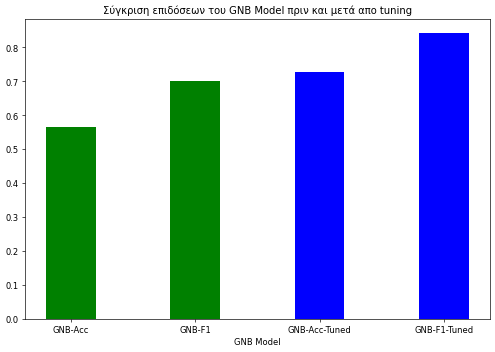

In [48]:
data1 = {'GNB-Acc':0.5636, 'GNB-F1':0.7}
data2 = {'GNB-Acc-Tuned':0.7272, 'GNB-F1-Tuned':0.8421}
courses1 = list(data1.keys())
values1 = list(data1.values())
courses2 = list(data2.keys())
values2 = list(data2.values())

fig = plt.figure(figsize =(10,6.5),dpi=60)

plt.bar(courses1,values1,color='GREEN', width=.4)
plt.bar(courses2,values2,color='blue', width=.4)
plt.xlabel("GNB Model")
plt.title("Σύγκριση επιδόσεων του GNB Model πριν και μετά απο tuning")
plt.show()

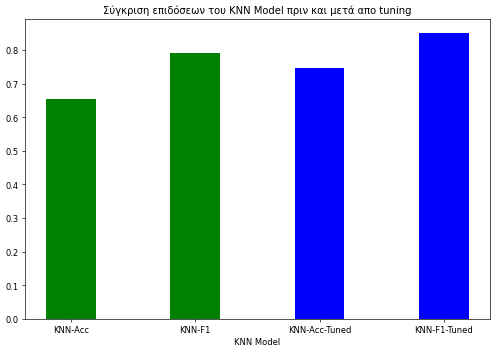

In [49]:
data1 = {'KNN-Acc':0.6545, 'KNN-F1':0.7912}
data2 = {'KNN-Acc-Tuned':0.7454, 'KNN-F1-Tuned':0.8510}
courses1 = list(data1.keys())
values1 = list(data1.values())
courses2 = list(data2.keys())
values2 = list(data2.values())

fig = plt.figure(figsize =(10,6.5),dpi=60)

plt.bar(courses1,values1,color='GREEN', width=.4)
plt.bar(courses2,values2,color='BLUE', width=.4)
plt.xlabel("KNN Model")
plt.title("Σύγκριση επιδόσεων του KNN Model πριν και μετά απο tuning")
plt.show()

### Πίνακες σύγχυσης

Όπως είδαμε και στον πίνακα παραπάνω,ο χειρότερος ταξινομητής ως προς την ορθότητα (accuracy) είναι ο LR, ενώ ο καλύτερος ταξινομητής ως προς την ορθότητα είναι ο KNN.

<AxesSubplot:>

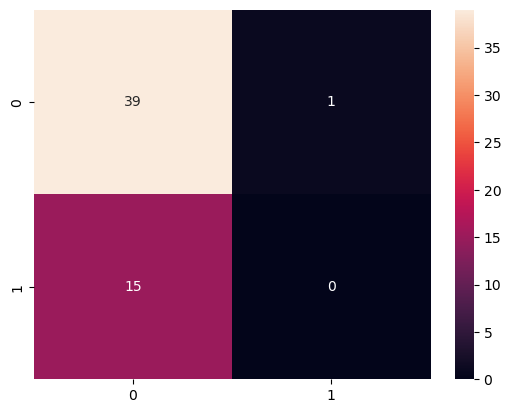

In [50]:
lr_matrix = confusion_matrix(y_test, lr_preds_pipe)

sns.heatmap(lr_matrix, annot=True)

<AxesSubplot:>

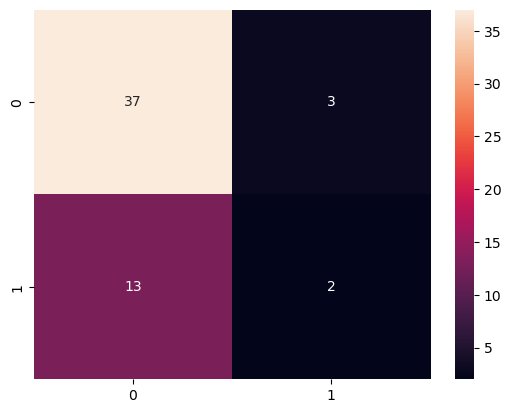

In [51]:
knn_matrix = confusion_matrix(y_test, knn_preds_pipe)
sns.heatmap(knn_matrix, annot=True)

Παρατηρούμε ότι τα μοντέλα δεν φαίνεται να μπορούν να διαχωρίσουν επιτυχώς τις δύο κλάσεις του dataset μας.
Πιθανόν τα features του παρόντος UCI dataset να μην περιέχουν την κατάλληλη πληροφορία για να προβλεφθεί η μεταβλητή στόχος.

Συμπερασματικά, για το συγκεκριμένο πρόβλημα προτείνεται ο ταξινομητής KNeirestNeighbors καθώς έχει τα υψηλότερα score τόσο σε Accuracy και σε F1. Οι κλάσεις δεν ήταν γραμμικά διαχωρίσιμες, και ως εκ τούτου δεν είδαμε βελτίωση στον ταξινομητή Logistic Regression. Αξίζει να σημειωθεί, πως οι 2 εκ των 3 ταξινομητών παρουσίασαν βελτίωση με την προεπεξεργασία σε σχέση με τα out-of-the-box scores τους. 